# Megaline Mobile Phone Company - Customer Classification <a class="tocSkip"></a>

----

### Introducción.

Este proyecto vamos a trabajar con datos pertenecientes a la compañía móvil Megaline, la cual no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Por lo que desean desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra, para lo cual tenemos acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos. 

Este proyecto se trata de una tarea de clasificación, en la cual se debe crear un modelo que escoja el plan correcto con la mayor exactitud posible, con un umbral de exactitud es 0.75.

En el enunciado nos indican que no es necesario realizar el paso de procesar los datos.


### Inicialización y carga de datos. 

Primero procedemos a importar Librerías:

In [68]:
# Cargamos todas las librerías que ocuparemos en el proyecto:
import pandas as pd # importamos las librerías de pandas
from matplotlib import pyplot as plt # importamos las librerías pyplot de Matplotlib
import numpy as np # importamos la librerías de NumPy, se usa para funciones matemáticas complejas
from scipy import stats as st # importamos el módulo stats de la librería SciPy.
import seaborn as sns # importamos la librería Seaborn para realizar unos gráficos
sns.set_theme() # ocupamos esa librería para tener meejores gráficos
from sklearn.model_selection import train_test_split #importamos la función train_test_split biblioteca scikit-learn
from sklearn.tree import DecisionTreeClassifier # importamos la clase DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # importamos la clase RandomForestClassifier 
from sklearn.metrics import accuracy_score # importamos la función accuracy_score de la biblioteca scikit-learn

Leemos el Conjunto de Datos con la información de la compañía móvil Megaline:

In [31]:
# Cargamos el DataFrame:
megaline = pd.read_csv('/datasets/users_behavior.csv') #cargamos el DataFrame.

Mostramos información general sobre el Conjunto de Datos:

In [33]:
# Imprimimos la información general/resumida sobre el DataFrame
megaline.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(megaline.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
----------
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


En base al método info podemos ver que el conjunto de datos se encuentra conformado por 5 columnas de variables. Todas corresponden a variables numéricas, siendo las columnas calls, minutes, messages y mb_used columnas float64 y la columna is-ultra una columna con datos enteros int64 de valores 0 y 1.

No se ve la presencia valores ausentes. 

In [34]:
# Utilizamos el método describe() para realizar una exploración rápida inicial de las variables numéricas
# del conjunto de datos.
megaline.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Ocupando el método describe() podemos tener toda la información de las distintas columnas del conjunto de datos. En particular vemos los valores de promedio, desviación estándar y valores máximos y mínimos para cada variable. Estos estadísticos nos pueden ayudar a comprender la distribución y la variabilidad de los datos, así como a identificar posibles valores atípicos o anomalías.

En particular, podemos ver que para la columna is_ultra, dado que es una columna binaria donde 1 representa el plan "Ultra" y 0 representa el plan "Smart", la media de esta columna indica la proporción de usuarios que están en el plan "Ultra".

Entonces, para el conjunto de datos Megaline, aproximadamente el 30.65% de los usuarios están en el plan "Ultra", mientras que el restante 69.35% están en el plan "Smart".

In [35]:
# Verificamos que no hay filas totalmente duplicadas en el Dataframe Megaline.
print('El número de filas totalmente duplicadas en el DF Megaline es:')
print(megaline.duplicated().sum())# verificamos si hay filas duplicadas.


print('------------------')

#Verificamos que no hay valores ausentes en el Dataframe.
megaline.isna().sum() # para conocer los valores ausentes ocupamos usamos el método isna() 
                          # junto con el método sum().



El número de filas totalmente duplicadas en el DF Megaline es:
0
------------------


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Solo a modo de verificación confirmamos que no hay filas duplicadas ni valores ausentes en el Dataframe.

Ahora, con el objeto de conocer un poco más el conjunto de datos antes de entrar a los modelos, realizaremos un conjunto de gráficos sobre como se comportan los promedios de cada variable en función del plan que tienen contratado.

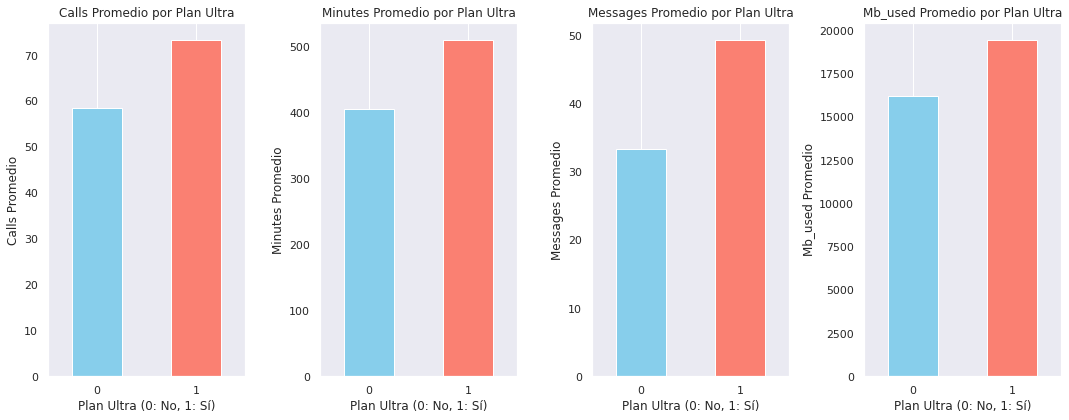

In [69]:
# Calculamos la media de cada característica para cada categoría del target
features = ['calls', 'minutes', 'messages', 'mb_used']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, start=1):
    plt.subplot(1, 4, i)
    feature_mean_by_ultra = megaline.groupby('is_ultra')[feature].mean()
    feature_mean_by_ultra.plot(kind='bar', color=colors)
    plt.title(f'{feature.capitalize()} Promedio por Plan Ultra')
    plt.xlabel('Plan Ultra (0: No, 1: Sí)')
    plt.ylabel(f'{feature.capitalize()} Promedio')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

A partir de los gráficos anteriores vemos que el promedio de las llamadas, minutos, mensajes y mb usados son mayores en los usuarios que tienen el plan Ultra.

### Segmentación de los datos. 

Vamos a proceder a segmentar los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.

In [37]:
# Extraemos la variable objetivo (target) del conjunto de datos y la almacenamos en target.
target = "is_ultra"
# Extraemos las características (features) del conjunto de datos y las almacenamos en features.
features = [c for c in megaline.columns if c not in [target]]

In [38]:
# Comprobamos que están correctas las caraterísticas (features), que son todos menos las variable aobjetivo.
features

['calls', 'minutes', 'messages', 'mb_used']

Vamos a realizar la segmentación de los datos en conjuntos de entrenamiento, validación y prueba utilizando la función train_test_split() de scikit-learn. 

El conjunto de datos Megaline se va a dividir en:

  Conjunto de Prueba (test_df): Se obtendrá del 18% del conjunto de datos original utilizando la primera llamada a train_test_split(). Este conjunto se utilizará para evaluar el rendimiento final del modelo.   
  
  Conjunto de Entrenamiento Completo (full_train_df): Se obtendrá del 82% restante del conjunto de datos original que no se utilizó para el conjunto de prueba.  
  
  Conjunto de Entrenamiento (train_df) y Conjunto de Validación (valid_df): Se obtienen dividiendo el conjunto de entrenamiento completo en una proporción del 77% y 23%, respectivamente, utilizando la segunda llamada a train_test_split(). 

In [39]:
# El dataset Megaline se divide en el conjunto de prueba (test_df) y el conjunto de entrenamiento completo
# (full_train_df):
full_train_df, test_df = train_test_split(
    megaline,
    test_size=0.18, 
    random_state=12345)

# El conjunto de entrenamiento completo (full_train_df) se divide en el conjunto de entrenamiento (train_df) y 
# conjunto de validación (valid_df):
train_df, valid_df = train_test_split(
    full_train_df, 
    test_size=0.23, 
    random_state=12345)

In [40]:
# Imprimimos las formas (shapes) de los conjuntos de datos resultantes, para verificar sus tamaños.
print("Forma del Dataframe:", megaline.shape)
print("Forma del conjunto de entrenamiento:", train_df.shape)
print("Forma del conjunto de validación:", valid_df.shape)
print("Forma del conjunto de prueba:", test_df.shape)

Forma del Dataframe: (3214, 5)
Forma del conjunto de entrenamiento: (2028, 5)
Forma del conjunto de validación: (607, 5)
Forma del conjunto de prueba: (579, 5)


Mediante este método shape() confirmamos el tamaño del conjunto de entrenamiento de 63%, el conjunto de validación 19% y el conjunto de prueba de un 18%.

In [42]:
[len (df)/ len (megaline) for df in [megaline, full_train_df, train_df, valid_df, test_df]]

[1.0,
 0.8198506533914126,
 0.6309894212818917,
 0.18886123210952085,
 0.18014934660858742]

Mediante este cálculo confirmamos los porcentajes de cada conjunto, vemos que el conjunto de entrenamiento tiene un 63% del total, en cambio los conjuntods de validación y prueba tienen un 19% y 18% erspectivamente.

### Modelo Árbol de Decisión. 

Primero evaluamos el rendimiento del modelo de árbol de decisión con una profundiad máxima (max_depth) igual a 1.

In [70]:
#Creamos el Modelo de Árbol de Decisión (DecisionTreeClassifier) con una profundidad máxima de 1 
# (para mantenerlo simple) y un estado aleatorio fijo para reproducibilidad.
model = DecisionTreeClassifier(max_depth=1, random_state=12345)

# Luego entrenamos el Modelo utilizando las características (features) del conjunto de entrenamiento (train_df)
# y la variable objetivo (target).
model. fit(train_df[features], train_df[target])

# Utilizamos el modelo entrenado para hacer predicciones sobre las características del conjunto de validación
# (valid_df[features]).
y_preds = model.predict(valid_df[features])

# Finalmente calculamos la exactitud del modelo comparando las etiquetas predichas (y_preds) 
# con las etiquetas reales del conjunto de validación (valid_df[target]).
accuracy_score(valid_df[target], y_preds)

0.7479406919275123

Obtuvimos una exactitud del modelo de aproximadamente 0.7479, lo que significa que el modelo de árbol de decisión clasificó correctamente alrededor del 74.79% de las muestras en el conjunto de validación.

Este resultado nos proporciona una indicación inicial del rendimiento del modelo. 

Ahora vamos a considerar ajustar el hiperparámetro de la profundidad máxima del árbol, ocupando un bucle for vamos a probar valores del 1 al 10, y registraremos el valor de profundidad que nos entregue la mayor exactitud.

In [71]:
max_score_depth = -1
for max_d in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

        model = DecisionTreeClassifier(max_depth=max_d, random_state=12345)

        model.fit(train_df[features], train_df[target])
        y_preds = model.predict(valid_df[features])

        score = accuracy_score(valid_df[target], y_preds)

        if score > max_score_depth:
            max_score_depth = score
            print(f"""
            Max depth: {max_d}
            Accuracy: {score}

            """)


            Max depth: 1
            Accuracy: 0.7479406919275123

            

            Max depth: 2
            Accuracy: 0.7726523887973641

            

            Max depth: 3
            Accuracy: 0.7940691927512356

            

            Max depth: 4
            Accuracy: 0.7990115321252059

            

            Max depth: 8
            Accuracy: 0.8023064250411862

            

            Max depth: 9
            Accuracy: 0.8138385502471169

            


El mejor valor de exactitud la obtuvimos para un valor de max_depth de 9, con una exactitud de aproximadamente 0.8138. Esto significa que el modelo de árbol de decisión con una profundidad máxima de 9 logró clasificar correctamente alrededor del 81.38% de las muestras en el conjunto de validación.

Ahora que con este valor 9 para max_depth, vamos a utilizar este valor para entrenar un modelo final y evaluar su rendimiento en el conjunto de prueba para obtener una evaluación más sólida del modelo.

In [72]:
# Primero creamos el Modelo Final, ocupando el mejor valor de max_depth encontrado durante la búsqueda 
# de hiperparámetros (9) y lo guardamos en la variable final_model.
final_model = DecisionTreeClassifier(max_depth=9, random_state=12345)

#Entrenamos el Modelo Final:
final_model.fit(full_train_df[features], full_train_df [target])

#Hacemos Predicciones en el Conjunto de Prueba:
test_preds = final_model.predict(test_df[features])

# Calculamos la Exactitud del Modelo Final
accuracy_score (test_df[target], test_preds)

0.7737478411053541

Obtuvimos una exactitud del modelo de aproximadamente 0.7737 en el conjunto de prueba. Esto significa que el modelo de árbol de decisión logró clasificar correctamente alrededor del 77.37% de las muestras en el conjunto de prueba.

Este resultado proporciona una evaluación final del rendimiento del modelo en datos no vistos, lo que indica cómo generaliza el modelo a nuevas observaciones. Una exactitud del 77.37% es bastante buena y superior al umbral del exactitud de 0,75 solicitado.


### Modelo Bosque Aleatorio. 

Primero para evaluar el rendimiento del modelo de Bosque Aleatorio en nuestros datos, comenzaremos probando el modelo con con 100 árboles en el bosque (n_estimators=100).

In [73]:
# Creamos el Modelo de Bosque Aleatorio (RandomForestClassifier) con 100 árboles en el bosque (n_estimators=100) 
# y un estado aleatorio fijo para reproducibilidad (random_state=12345).
model = RandomForestClassifier(n_estimators=100, random_state=12345)

# Luego entrenamos el Modelo utilizando las características (features) del conjunto de entrenamiento (train_df)
# y la variable objetivo (target).
model.fit(train_df[features], train_df[target])

# Utilizamos el modelo entrenado para hacer predicciones sobre las características del conjunto de validación
# (valid_df[features]).
y_preds = model.predict(valid_df[features])

# Finalmente calculamos la exactitud del modelo comparando las etiquetas predichas (y_preds) 
# con las etiquetas reales del conjunto de validación (valid_df[target]).
accuracy_score(valid_df[target], y_preds)

0.8088962108731467

Obtuvimos una exactitud del modelo de aproximadamente 0.8089 al usar el modelo de Bosque Aleatorio en el conjunto de validación. Esto significa que el modelo de Bosque Aleatorio logró clasificar correctamente alrededor del 80.89% de las muestras en el conjunto de validación.



Ahora vamos a explorar diferentes combinaciones de hiperparámetros y encontrar la que maximice el rendimiento del modelo en el conjunto de validación.

Para ello vamos a utilizar un bucle for anidado para iterar sobre diferentes valores de dos hiperparámetros del modelo de Bosque Aleatorio: el número de estimadores (n_estimators) y la profundidad máxima del árbol (max_depth). 
Ocuparemos valores de n_estimators (50, 100, 150, 200) y max_depth (5, 10, 15).

In [76]:
# Bucle para Ajustar los Hiperparámetros y luego actualizar el Mejor Puntaje: 
max_score = -100
for n_estims in [50, 100, 150, 200]: 
        for max_d in [5, 10, 15]:

            model = RandomForestClassifier(n_estimators=n_estims, max_depth=max_d, random_state=12345)

            model.fit(train_df[features], train_df[target])
            y_preds = model.predict(valid_df[features])

            score_1 = accuracy_score(valid_df[target], y_preds)

            if score_1 > max_score:
                max_score = score_1
                print(f"""
                N estimators: {n_estims}
                Max depth: {max_d}
                Accuracy: {score}

                """)


                N estimators: 50
                Max depth: 5
                Accuracy: 0.7973640856672158

                

                N estimators: 50
                Max depth: 10
                Accuracy: 0.7973640856672158

                

                N estimators: 100
                Max depth: 10
                Accuracy: 0.7973640856672158

                


El mejor resultado de exactitud encontrado fue para una combinación de hiperparámetros con 100 estimadores (n_estimators) y una profundidad máxima del árbol de 10 (max_depth). La exactitud alcanzada con esta configuración fue de aproximadamente 0.7973 en el conjunto de validación.

Ahora utilizando la combinación óptima de hiperparámetros que encontramos (100 estimadores y profundidad máxima del árbol de 10) vamos a entrenar un modelo final de Bosque Aleatorio y lo evaluamos en el conjunto de prueba.

In [77]:
# Creamos el Modelo Final de Bosque Aleatorio,, con los hiperparámetros óptimos encontrados 
# (100 estimadores y profundidad máxima del árbol de 10): 
final_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=12345)

#Entrenamos el Modelo Final:
final_model.fit(full_train_df[features], full_train_df [target])

#Hacemos Predicciones en el Conjunto de Prueba:
test_preds = final_model.predict(test_df[features])

# Calculamos la Exactitud del Modelo Final:
accuracy_score (test_df[target], test_preds)

0.7979274611398963

Obtuvimos una exactitud del modelo de aproximadamente 0.7979 en el conjunto de prueba al usar el modelo final de Bosque Aleatorio con la combinación óptima de hiperparámetros (100 estimadores y profundidad máxima del árbol de 10). Esto significa que el modelo logró clasificar correctamente alrededor del 79.79% de las muestras en el conjunto de prueba.

Este resultado es importante porque proporciona una evaluación final del rendimiento del modelo en datos no vistos. Es un buen indicador de cómo generaliza el modelo a nuevas observaciones. 

La exactitud de este modelo final de Bosque Aleatorio (79,79%) fue mayor que el obtenido en el modelo final de árbol de decisión estudiado previamente, con el cual se obtuvo un valor de 77,37% y superior al umbral del exactitud de 0,75 solicitado.

### Prueba de Cordura. 

La prueba de cordura es una técnica utilizada para evaluar la validez y la lógica de los resultados obtenidos de un modelo predictivo. Consiste en realizar verificaciones o cálculos simples para asegurarse de que los resultados del modelo tengan sentido en el contexto del problema que se está abordando.

En el contexto de nuestro problema de clasificación binaria, donde el objetivo es predecir si un usuario está en el plan "Ultra" o "Smart", una prueba de cordura común es verificar la proporción de cada clase en el conjunto de prueba y compararla con la proporción esperada en la población real.

Para ello vamos a calcular la proporción de muestras con el valor de la clase 1 (plan "Ultra") y la proporción de muestras con el valor de la clase 0 (plan "Smart") en el conjunto de prueba.

In [62]:
#calculamos la proporción de muestras con el valor de la clase 1 (plan "Ultra") en el conjunto de prueba.
(test_df[target] == 1). mean ()

0.31088082901554404

In [63]:
#calculamos la proporción de muestras con el valor de la clase  0 (plan "Smart") en el conjunto de prueba.
(test_df[target] == 0).mean()

0.689119170984456

El resultado de 0.3108 indica que aproximadamente el 31.08% de las muestras en el conjunto de prueba pertenecen al plan "Ultra".
El resultado de 0.6891 indica que aproximadamente el 68.91% de las muestras en el conjunto de prueba pertenecen al plan "Smart".

Estos resultados tienen sentido, ya que reflejan la distribución esperada de las clases en el conjunto de prueba. 

De acuerdo a lo que nos proporcionó el método describe(), en el conjunto de datos Megaline, el 30.65% de las muestras están en el plan "Ultra" (como se indica en la columna is_ultra), mientras que el restante 69.35% están en el plan "Smart". Por lo tanto, los resultados obtenidos están en línea con esta distribución.

### Conclusión General. 


En este proyecto, hemos explorado el conjunto de datos de Megaline con el objetivo de predecir los planes de los usuarios (Ultra o Smart) basándonos en su comportamiento de uso. Para lograrlo, probamos dos modelos de aprendizaje automático: Árbol de Decisión y Bosque Aleatorio. Durante el proceso, realizamos ajustes en los hiperparámetros de cada modelo para mejorar su rendimiento y maximizar la exactitud de las predicciones.

Nuestra evaluación reveló que el modelo final de Bosque Aleatorio superó al modelo de Árbol de Decisión en términos de exactitud. El modelo de Bosque Aleatorio logró una exactitud del 79.79%, mientras que el modelo de Árbol de Decisión obtuvo una exactitud del 77.37%. Además, el modelo de Bosque Aleatorio también superó el umbral de exactitud requerido del 75%.

Una de las fortalezas del modelo de Bosque Aleatorio es su capacidad para generalizar bien a datos no vistos y manejar relaciones más complejas en los datos. Esto se refleja en su rendimiento superior en comparación con el modelo de Árbol de Decisión.

En resumen, este proyecto nos ha permitido explorar y comprender el proceso de desarrollo de modelos de aprendizaje automático, desde la exploración de datos hasta la evaluación y selección de modelos. El éxito del modelo de Bosque Aleatorio destaca la importancia de la experimentación con diferentes hiperparámetros para obtener los mejores resultados posibles en problemas de clasificación.